# Implementatation of ridge regression

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

### Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

Sanitizing all the columns that contains NaN (Data set to zero or -999)

In [3]:
from helpers import sanitize_NaN

tX = sanitize_NaN(tX)       

### Now let us turn to the proper machine learning side of the problem

The run ridge regression function here computes everything we need in our problem. It works the follwing way.
- We define the parameters for our run, basically the degrees and the lambdas we want.
- The cross_validation function performs a k-fold cross-validation (takes a lot of time) and then returns the best degree of polynomial along with the associated lambda. 
- Then we just have to re-run the ridge regression once more with those parameters to get the optimal weights.
- The final step is to run the model on the testing data set, do our prediction and save the result
    


 Testing for a polynomial of degree  1
lambda= 0.0001, RMSE_BEST_VALUE :  1.03108848293
lambda= 0.000133, RMSE_BEST_VALUE :  1.03108846347
lambda= 0.000176, RMSE_BEST_VALUE :  1.0310884379
lambda= 0.000233, RMSE_BEST_VALUE :  1.03108840449
lambda= 0.000309, RMSE_BEST_VALUE :  1.03108836051
lambda= 0.000409, RMSE_BEST_VALUE :  1.03108830318
lambda= 0.000543, RMSE_BEST_VALUE :  1.03108822871
lambda= 0.00072, RMSE_BEST_VALUE :  1.0310881325
lambda= 0.000954, RMSE_BEST_VALUE :  1.03108800923
lambda= 0.001265, RMSE_BEST_VALUE :  1.03108785261
lambda= 0.001677, RMSE_BEST_VALUE :  1.03108765703
lambda= 0.002223, RMSE_BEST_VALUE :  1.03108741607
lambda= 0.002947, RMSE_BEST_VALUE :  1.0310871257
lambda= 0.003907, RMSE_BEST_VALUE :  1.031086784
lambda= 0.005179, RMSE_BEST_VALUE :  1.03108639363
lambda= 0.006866, RMSE_BEST_VALUE :  1.03108596263
lambda= 0.009103, RMSE_BEST_VALUE :  1.03108550422
lambda= 0.012068, RMSE_BEST_VALUE :  1.03108503632
lambda= 0.015999, RMSE_BEST_VALUE :  1.03108457821

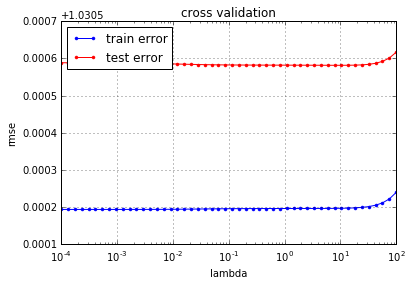

In [13]:
from ridge_regression import cross_validation, ridge_regression

def run_ridge_regression_sanitized(y, tX):
    """ridge regression running script."""
    
    # define parameters for our run   
    seed = 1
    degrees = np.array([1])
    k_fold = 4
    lambdas = np.logspace(-4,2,50)
    
    rmse,lambda_ = cross_validation(y,tX,degrees,lambdas,k_fold,seed)
    
    weights = ridge_regression(y, tX, lambda_[0])

    DATA_TEST_PATH = 'data/test.csv'  # Download train data and supply path here 
    y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
    tX_test_sorted = sanitize_NaN(tX_test)
    
    OUTPUT_PATH = 'data/output_sanitized_normalization_test.csv' # Fill in desired name of output file for submission
    y_pred = predict_labels(weights, tX_test_sorted)
    create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

run_ridge_regression_sanitized(y,tX)